<a href="https://colab.research.google.com/github/aksha1234/Deep-learning-tutorials/blob/main/code_06_XX_Incident_Root_Cause_Analysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Incident Root Cause Analysis 

Incident Reports in ITOps usually states the symptoms. Identifying the root cause of the symptom quickly is a key determinant to reducing resolution times and improving user satisfaction.

# 06.02. Preprocessing Incident Data

### Loading the Dataset

In [96]:
import pandas as pd
import os
import tensorflow as tf

url='https://raw.githubusercontent.com/aksha1234/Deep-learning-tutorials/main/root_cause_analysis.csv'

#Load the data file into a Pandas Dataframe
symptom_data = pd.read_csv(url)

#Explore the data loaded
print(symptom_data.dtypes)
symptom_data.head()

ID                   int64
CPU_LOAD             int64
MEMORY_LEAK_LOAD     int64
DELAY                int64
ERROR_1000           int64
ERROR_1001           int64
ERROR_1002           int64
ERROR_1003           int64
ROOT_CAUSE          object
dtype: object


,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


### Convert  data

Input data needs to be converted to formats that can be consumed by ML algorithms

In [97]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
symptom_data['ROOT_CAUSE'] = label_encoder.fit_transform(
                                symptom_data['ROOT_CAUSE'])

#Convert Pandas DataFrame to a numpy vector
np_symptom = symptom_data.to_numpy().astype(float)

#Extract the feature variables (X)
X_data = np_symptom[:,1:8]

#Extract the target variable (Y), conver to one-hot-encodign
Y_data=np_symptom[:,8]
Y_data = tf.keras.utils.to_categorical(Y_data,3)

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("Shape of feature variables :", X_train.shape)
print("Shape of target variable :",Y_train.shape)

Shape of feature variables : (900, 7)
Shape of target variable : (900, 3)


## 06.03. Building and evaluating the model

In [98]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup Training Parameters
EPOCHS=20
BATCH_SIZE=64
VERBOSE=1
OUTPUT_CLASSES=len(label_encoder.classes_)
N_HIDDEN=128
VALIDATION_SPLIT=0.2

#Create a Keras sequential model
model = tf.keras.models.Sequential()
#Add a Dense Layer
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(7,),
                              name='Dense-Layer-1',
                              activation='relu'))

#Add a second dense layer
model.add(keras.layers.Dense(N_HIDDEN,
                              name='Dense-Layer-2',
                              activation='relu'))

#Add a softmax layer for categorial prediction
model.add(keras.layers.Dense(OUTPUT_CLASSES,
                             name='Final',
                             activation='softmax'))

#Compile the model
model.compile(
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

#Build the model
model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-1 (Dense)       (None, 128)               1024      
                                                                 
 Dense-Layer-2 (Dense)       (None, 128)               16512     
                                                                 
 Final (Dense)               (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 1s 17ms/step - loss: 0.9016 - accuracy: 0.6931 - val_loss: 0.6964 - val_accuracy: 0.8278
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.7653 - val_loss: 0.5240 - val_accuracy: 0.8333
Epoch 3/20
12/12 [==============

[0.28078481554985046, 0.8999999761581421]

## 06.04. Predicting Root Causes

In [99]:
#Pass individual flags to Predict the root cause
import numpy as np

CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1 )

print(label_encoder.inverse_transform(prediction))

['DATABASE_ISSUE']


In [100]:
#Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(
        model.predict([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis=1 )))

['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']


In [101]:
df=pd.read_csv(url)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   CPU_LOAD          1000 non-null   int64 
 2   MEMORY_LEAK_LOAD  1000 non-null   int64 
 3   DELAY             1000 non-null   int64 
 4   ERROR_1000        1000 non-null   int64 
 5   ERROR_1001        1000 non-null   int64 
 6   ERROR_1002        1000 non-null   int64 
 7   ERROR_1003        1000 non-null   int64 
 8   ROOT_CAUSE        1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [103]:
df.head(5)

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [104]:
df.ROOT_CAUSE.value_counts()

DATABASE_ISSUE    340
NETWORK_DELAY     337
MEMORY_LEAK       323
Name: ROOT_CAUSE, dtype: int64

In [105]:
input_cols=df.columns.tolist()[1:-1]

In [106]:
target_col=df.columns.tolist()[-1]

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler=StandardScaler().fit(df[input_cols])

In [109]:
df[input_cols]=scaler.transform(df[input_cols])

In [110]:
df

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,-0.945484,-0.847475,-0.806328,-0.808018,1.030464,-0.872103,1.274626,MEMORY_LEAK
1,2,-0.945484,-0.847475,-0.806328,-0.808018,-0.970437,-0.872103,1.274626,MEMORY_LEAK
2,3,-0.945484,1.179976,1.240190,-0.808018,-0.970437,1.146654,1.274626,MEMORY_LEAK
3,4,-0.945484,1.179976,-0.806328,1.237597,1.030464,-0.872103,1.274626,MEMORY_LEAK
4,5,1.057660,1.179976,-0.806328,1.237597,-0.970437,1.146654,-0.784544,NETWORK_DELAY
...,...,...,...,...,...,...,...,...,...
995,996,-0.945484,-0.847475,-0.806328,-0.808018,-0.970437,-0.872103,1.274626,DATABASE_ISSUE
996,997,-0.945484,-0.847475,-0.806328,1.237597,-0.970437,-0.872103,-0.784544,NETWORK_DELAY
997,998,1.057660,1.179976,1.240190,-0.808018,-0.970437,-0.872103,-0.784544,MEMORY_LEAK
998,999,-0.945484,1.179976,1.240190,1.237597,1.030464,-0.872103,-0.784544,NETWORK_DELAY


In [111]:
## First of all making label encoder for target columns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder().fit(df[target_col])

In [112]:
df[target_col]=encoder.transform(df[target_col])

In [113]:
encoder.classes_

array(['DATABASE_ISSUE', 'MEMORY_LEAK', 'NETWORK_DELAY'], dtype=object)

In [114]:
df

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,-0.945484,-0.847475,-0.806328,-0.808018,1.030464,-0.872103,1.274626,1
1,2,-0.945484,-0.847475,-0.806328,-0.808018,-0.970437,-0.872103,1.274626,1
2,3,-0.945484,1.179976,1.240190,-0.808018,-0.970437,1.146654,1.274626,1
3,4,-0.945484,1.179976,-0.806328,1.237597,1.030464,-0.872103,1.274626,1
4,5,1.057660,1.179976,-0.806328,1.237597,-0.970437,1.146654,-0.784544,2
...,...,...,...,...,...,...,...,...,...
995,996,-0.945484,-0.847475,-0.806328,-0.808018,-0.970437,-0.872103,1.274626,0
996,997,-0.945484,-0.847475,-0.806328,1.237597,-0.970437,-0.872103,-0.784544,2
997,998,1.057660,1.179976,1.240190,-0.808018,-0.970437,-0.872103,-0.784544,1
998,999,-0.945484,1.179976,1.240190,1.237597,1.030464,-0.872103,-0.784544,2


In [115]:
df=df.drop(columns='ID').to_numpy()

In [116]:
input_cols

['CPU_LOAD',
 'MEMORY_LEAK_LOAD',
 'DELAY',
 'ERROR_1000',
 'ERROR_1001',
 'ERROR_1002',
 'ERROR_1003']

In [119]:
train_inputs=df[:,0:-1]

In [120]:
train_targets=df[:,-1]

In [121]:
train_inputs.shape

(1000, 7)

In [122]:
## Now making teh one hot encoding of the target columns
train_targets=tf.keras.utils.to_categorical(train_targets,len(encoder.classes_))

In [123]:
## Now training the model 
model=keras.models.Sequential(name='root_cause_analysis')

In [124]:
model.add(keras.layers.Dense(32,input_shape=(7,),name='Hidden_Layers_1',activation='relu'))

In [125]:
model.add(keras.layers.Dense(32,name='Hidden_Layers_2',activation='relu'))

In [126]:
model.add(keras.layers.Dense(len(encoder.classes_),name='Output_Layers',activation='softmax'))

In [127]:
model.compile(optimizer='adagrad',loss='categorical_crossentropy',metrics='accuracy')

In [128]:
model.summary()

Model: "root_cause_analysis"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layers_1 (Dense)     (None, 32)                256       
                                                                 
 Hidden_Layers_2 (Dense)     (None, 32)                1056      
                                                                 
 Output_Layers (Dense)       (None, 3)                 99        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [129]:
history=model.fit(train_inputs,train_targets,batch_size=16,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 1s 5ms/step - loss: 1.1226 - accuracy: 0.3913 - val_loss: 1.1710 - val_accuracy: 0.2800
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0911 - accuracy: 0.4038 - val_loss: 1.1440 - val_accuracy: 0.3200
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.4363 - val_loss: 1.1221 - val_accuracy: 0.3300
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.4387 - val_loss: 1.1031 - val_accuracy: 0.3300
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0264 - accuracy: 0.4350 - val_loss: 1.0863 - val_accuracy: 0.3300
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.4500 - val_loss: 1.0714 - val_accuracy: 0.3900
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.4638 - val_loss: 1.0580 - val_accuracy: 0.4100
Epoch 8/10
50/50 [==

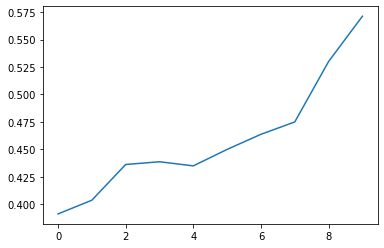

In [130]:
pd.DataFrame(history.history)['accuracy'].plot()

In [131]:
input_cols

['CPU_LOAD',
 'MEMORY_LEAK_LOAD',
 'DELAY',
 'ERROR_1000',
 'ERROR_1001',
 'ERROR_1002',
 'ERROR_1003']

In [132]:
data=pd.DataFrame([dict(zip(input_cols,[0,1,1,0,1,0,1]))])

In [136]:
## Sol let us make a define function which can be used to change the hyperparametr in the model

def provide_accuracy(hidden_nodes,batchsize,optimizer,data):
  model=keras.models.Sequential()
  model.add(keras.layers.Dense(hidden_nodes,input_shape=(train_inputs.shape[1],),activation='relu',name='Hidden_Layer-1'))
  model.add(keras.layers.Dense(hidden_nodes,activation='relu',name='Hidden_Layer-2'))
  model.add(keras.layers.Dense(len(encoder.classes_),activation='softmax',name='output_Layer'))
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')
  history=model.fit(train_inputs,train_targets,batch_size=batchsize,epochs=15,verbose=1,validation_split=0.2)
  pd.DataFrame(history.history)['accuracy'].plot(figsize=(10,8))
  df=data.copy()
  df[input_cols]=scaler.transform(df[input_cols])
  df=df.to_numpy()
  pred=model.predict(df)
  return print('\n',encoder.inverse_transform([np.argmax(pred)]))




Epoch 1/15
100/100 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.7950 - val_loss: 0.5384 - val_accuracy: 0.7700
Epoch 2/15
100/100 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8388 - val_loss: 0.5121 - val_accuracy: 0.7800
Epoch 3/15
100/100 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8400 - val_loss: 0.5003 - val_accuracy: 0.8200
Epoch 4/15
100/100 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8537 - val_loss: 0.4898 - val_accuracy: 0.8300
Epoch 5/15
100/100 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8525 - val_loss: 0.4851 - val_accuracy: 0.7900
Epoch 6/15
100/100 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8587 - val_loss: 0.4745 - val_accuracy: 0.8300
Epoch 7/15
100/100 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8587 - val_loss: 0.4564 - val_accuracy: 0.8000
Epoch 

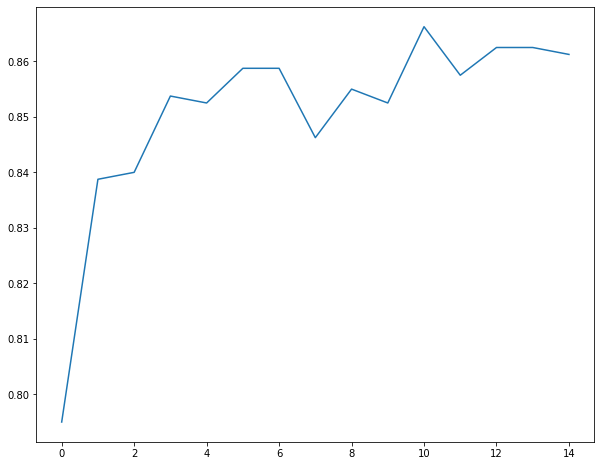

In [137]:
provide_accuracy(128,8,'adam',data)